# What makes a Kickstarter campaign successful?

## Project Overview

Purpose of the project...

Data source...

## Data Cleaning

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Imputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the data
origin_data = pd.read_csv('./Data/ks-projects-201801.csv',index_col=[0])

data = origin_data.copy()
#In this project, we ignore the title's factor to the successful rate. 
#data.drop("name",inplace=True, axis=1)

#We only consider the projects are completed. 
data = data[data.state != "live"]

#There are many other states like failed, suspended, we consider them as failed.
data.state = data.state == "successful"

In [4]:
#Convert the data to datetime
data.deadline = pd.to_datetime(data.deadline)
data.launched = pd.to_datetime(data.launched)

In [21]:
# Remove data points that say date launched is in 1970
low = min(data.launched)
data = data[data.launched != low]

### Check for Null data and use bfill to fill the data


In [5]:
pd.isna(data).any()
data.fillna(method="bfill",inplace=True)

In [6]:
data.category = "sub_"+ data.category
rawdata = data.copy()
le = LabelEncoder()
total =[]
for col in data.columns:
        if col != "name":
            if data.dtypes[col] == "object":
                total +=  list(data[col].astype(str))
le.fit(total)
for col in data.columns:
        if col != "name":
            if data.dtypes[col] == "object":
                data[col] = le.transform(data[col].astype(str))

In [7]:
num_cam = data['launched'].groupby([data['launched'].dt.year.rename('year'), data['launched'].dt.month.rename('month')]).agg({'count'})


In [8]:
data["month"] = data["launched"].dt.month
data["month_deadline"] = data["deadline"].dt.month
data["launch_day_of_week"] = data["launched"].dt.dayofweek
data["duration"] = ((data["deadline"]  - data['launched'])/ np.timedelta64(1, 'D')).astype(int)
data["year"] = data["launched"].dt.year

In [9]:
data = pd.merge(data, num_cam, on=["month","year"])

In [10]:
data.head(2)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month,month_deadline,launch_day_of_week,duration,year,count
0,The Songs of Adelaide & Abullah,160,43,23,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,False,0,22,0.0,0.0,1533.95,8,10,1,58,2015,5723
1,Legacy of Svarog | a Unique 3D Action RPG and ...,200,24,51,2015-10-30,50000.0,2015-08-31 06:33:31,1410.0,False,38,50,1410.0,1410.0,50000.00,8,10,0,59,2015,5723


In [11]:
%store data
%store le
%store rawdata

Stored 'data' (DataFrame)
Stored 'le' (LabelEncoder)
Stored 'rawdata' (DataFrame)


### Convert Catagorial Data to Numerical

## Exploratory Data Analysis

Purpose of the data exploration...

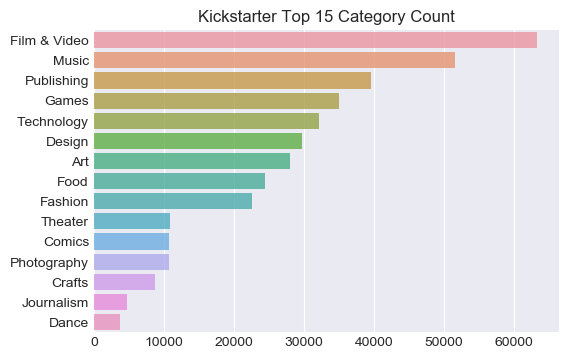

In [29]:
sns.set_style('darkgrid')
mains =rawdata.main_category.value_counts().head(15)

x = mains.values
y = mains.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', alpha=0.8)

plt.title('Kickstarter Top 15 Category Count')
plt.show()

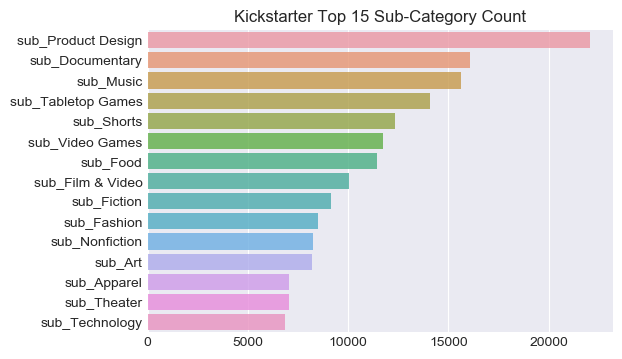

In [30]:
cats = rawdata.category.value_counts().head(15)

x = cats.values
y = cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Count')
plt.show()

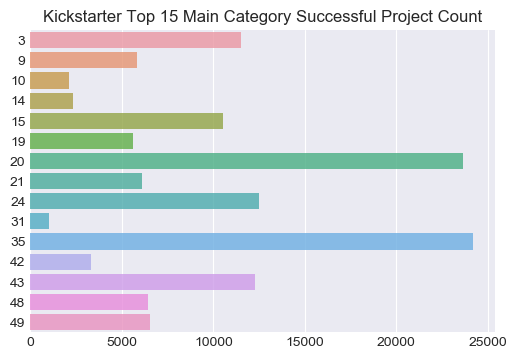

In [14]:
successful_data = data[data.state == 1]
suc_cats = successful_data.main_category.value_counts().head(15)

x = suc_cats.values
y = suc_cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h',  alpha=0.8)

plt.title('Kickstarter Top 15 Main Category Successful Project Count')
plt.show()

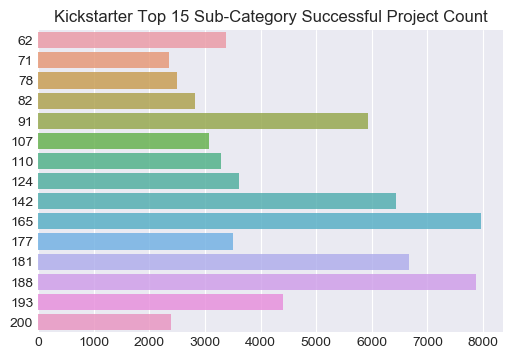

In [15]:
successful_data = data[data.state == 1]
suc_cats = successful_data.category.value_counts().head(15)

x = suc_cats.values
y = suc_cats.index

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax = sns.barplot(y=y, x=x, orient='h', alpha=0.8)

plt.title('Kickstarter Top 15 Sub-Category Successful Project Count')
plt.show()

In [41]:
print("Total Number of Completed Projects:", len(data),"\n"
      "Total Number of Successful Projects:", len(data[data.state == 1]),"\n"
      "Successful Rate Among All projects:",str(round(len(data[data.state == 1])/len(data)* 100,2)) + "%\n"
      "Number of Catagories: Main catagories num -", len(set(data["main_category"])), "Sub catagories num -", len(set(data["category"])),"\n"
     )

Total Number of Completed Projects: 375862 
Total Number of Successful Projects: 133956 
Successful Rate Among All projects: 35.64%
Number of Catagories: Main catagories num - 15 Sub catagories num - 159 



In [42]:
data.describe(percentiles=[0.3,0.7])

,category,main_category,currency,goal,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month_launched,month_deadline,launch_day_of_week,duration,year,month,count
count,375862.000000,375862.000000,375862.000000,3.758620e+05,3.758620e+05,375862.000000,375862.000000,3.758620e+05,3.758620e+05,3.758620e+05,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000,375862.000000
mean,132.781667,26.595471,43.721347,4.887465e+04,9.687431e+03,105.896866,42.864823,7.072391e+03,9.082678e+03,4.532720e+04,6.425403,6.761929,2.422009,33.441473,2014.227014,6.425403,4835.875151
std,45.088300,13.459400,14.543039,1.176595e+06,9.588649e+04,909.952393,14.309326,7.861346e+04,9.127075e+04,1.145865e+06,3.310220,3.320265,1.764459,66.142888,1.925235,3.310220,1902.347191
min,52.000000,3.000000,2.000000,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,1.000000,1.000000,0.000000,0.000000,1970.000000,1.000000,2.000000
30%,104.000000,20.000000,51.000000,2.500000e+03,7.000000e+01,3.000000,50.000000,4.000000e+01,7.000000e+01,2.500000e+03,4.000000,5.000000,1.000000,29.000000,2013.000000,4.000000,3962.000000
50%,139.000000,21.000000,51.000000,5.100000e+03,6.250000e+02,12.000000,50.000000,4.000000e+02,6.274500e+02,5.480000e+03,6.000000,7.000000,2.000000,29.000000,2014.000000,6.000000,4463.000000
70%,165.000000,35.000000,51.000000,1.250000e+04,2.941406e+03,42.000000,50.000000,2.108000e+03,2.928782e+03,1.238927e+04,9.000000,9.000000,3.000000,32.000000,2015.000000,9.000000,5659.000000
max,210.000000,49.000000,51.000000,1.000000e+08,2.033899e+07,219382.000000,50.000000,2.033899e+07,2.033899e+07,1.663614e+08,12.000000,12.000000,6.000000,16738.000000,2018.000000,12.000000,10775.000000


In [43]:
data.corr()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,month_launched,month_deadline,launch_day_of_week,duration,year,month,count
category,1.000000,0.157762,-0.012248,0.003316,0.028928,0.022527,0.041134,-0.012496,0.025946,0.029428,0.002602,-0.001634,-0.005784,-0.004689,-0.001292,-0.038873,-0.001634,-0.041840
main_category,0.157762,1.000000,-0.016455,0.003344,0.002720,-0.033623,-0.005700,-0.016755,0.003370,0.003672,0.001594,0.000854,-0.005375,0.001444,0.007173,-0.009930,0.000854,0.004988
currency,-0.012248,-0.016455,1.000000,-0.005467,0.005864,0.067145,0.012154,0.979930,0.014107,0.010847,-0.003873,-0.028365,-0.022725,0.004535,0.005256,-0.274471,-0.028365,-0.158479
goal,0.003316,0.003344,-0.005467,1.000000,0.007339,-0.024483,0.004077,-0.004920,0.005597,0.005172,0.941677,0.000954,0.000298,-0.002276,0.004323,0.015740,0.000954,0.012782
pledged,0.028928,0.002720,0.005864,0.007339,1.000000,0.111850,0.717427,0.005672,0.856305,0.953369,0.005099,0.002464,0.005791,-0.025551,0.000829,0.029772,0.002464,0.002265
state,0.022527,-0.033623,0.067145,-0.024483,0.111850,1.000000,0.129230,0.066111,0.097320,0.110786,-0.023246,-0.011550,-0.002458,-0.018810,-0.025708,-0.085120,-0.011550,-0.130694
backers,0.041134,-0.005700,0.012154,0.004077,0.717427,0.129230,1.000000,0.012082,0.697003,0.752489,0.004584,-0.002278,0.003404,-0.028078,-0.000780,0.016933,-0.002278,-0.002115
country,-0.012496,-0.016755,0.979930,-0.004920,0.005672,0.066111,0.012082,1.000000,0.013858,0.010901,-0.003072,-0.026805,-0.021437,0.003597,0.005600,-0.271817,-0.026805,-0.158080
usd pledged,0.025946,0.003370,0.014107,0.005597,0.856305,0.097320,0.697003,0.013858,1.000000,0.905955,0.006240,-0.005885,-0.003462,-0.020130,0.000820,-0.006187,-0.005885,0.008757
usd_pledged_real,0.029428,0.003672,0.010847,0.005172,0.953369,0.110786,0.752489,0.010901,0.905955,1.000000,0.005669,0.000122,0.004185,-0.025895,0.000944,0.022448,0.000122,0.002874


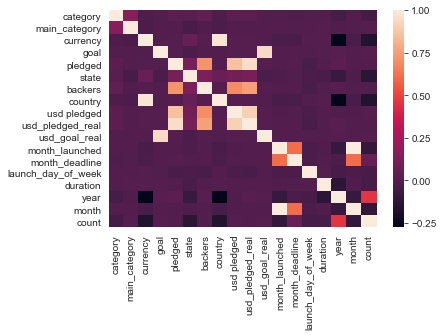

In [44]:
sns.heatmap(data.corr(), 
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)

Analysis of the visualization here...

In [36]:
# Separate data into two different sets based on whether or not the campaign was successful
success = data.loc[data['state'] == True]
fail = data.loc[data['state'] == False]

Text(0.5,1,'Normalized Distribution of Goal Amounts for Successful and Failed Projects (0-100000 dollars)')

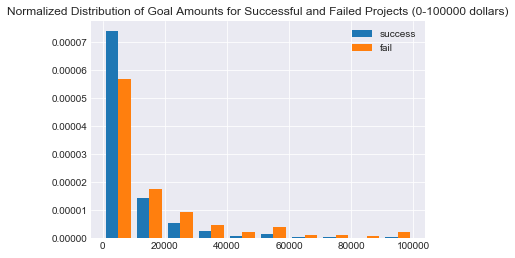

In [18]:
plt.hist([success.goal, fail.goal], range=[0, 100000], label=['success', 'fail'], density=True)
plt.legend()
plt.title('Normalized Distribution of Goal Amounts for Successful and Failed Projects (0-100000 dollars)')

Text(0.5,1,'Normalized Distribution of Goal Amounts for Successful and Failed Projects (100000-1000000 dollars)')

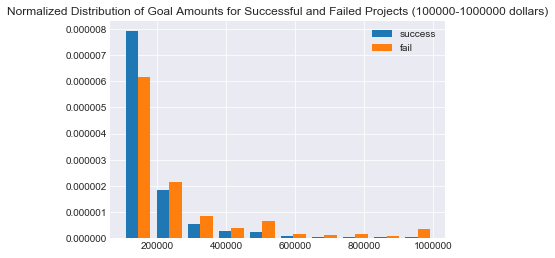

In [34]:
plt.hist([success.goal, fail.goal], range=[100000, 1000000], label=['success', 'fail'], density=True)
plt.legend()
plt.title('Normalized Distribution of Goal Amounts for Successful and Failed Projects (100000-1000000 dollars)')

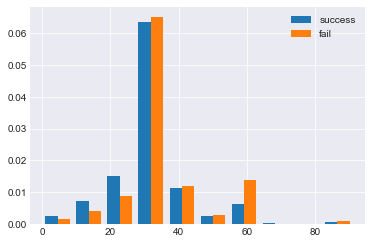

In [23]:
plt.hist([success.duration, fail.duration], label=['success', 'fail'], density=True)
plt.legend()
plt.title('Normalized Distribution of Campaign Length for Successful and Failed Projects')

Text(0.5,1,'Normalized Distribution of the Month the Campaign was launched for Successful and Failed Projects')

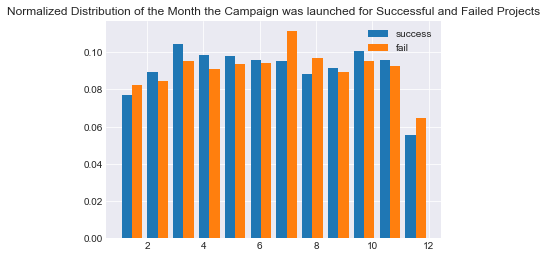

In [37]:
plt.hist([success.month, fail.month], bins=12, density=True, label=['success', 'fail'])
plt.legend()
plt.title('Normalized Distribution of the Month the Campaign was launched for Successful and Failed Projects')

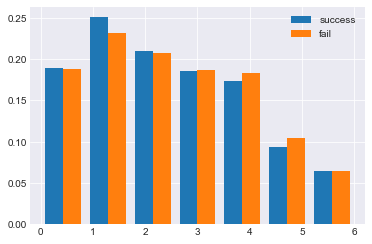

In [38]:
plt.hist([success.launch_day_of_week, fail.launch_day_of_week], bins=7, density=True, label=['success', 'fail'])
plt.legend()

## Statistical Modeling

In [4]:
# Statistical Modeling code here: 
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%store -r data
%store -r le
newdata = data
newdata.state = data.state.astype(int)
newdata

### Multiple Regression

In [ ]:
# Creates Model
full_model = smf.ols(formula='state ~ goal + pledged + category + main_category + backers + country', data=newdata).fit()
full_model.summary()

In [ ]:
# Make predictions
data['mult_predictions'] = full_model.predict()
data.loc[data["mult_predictions"] >= 0.5,"mult_predictions"] = 1
data.loc[data["mult_predictions"] < 0.5,"mult_predictions"] = 0

In [1]:
# Visualize results
real_success = len(data[data['state'] == 1])
fake_success = len(data[data['mult_predictions'] == 1])
real_failed = len(data[data['state'] == 0])
fake_failed = len(data[data['mult_predictions'] == 0])

x = ['Pass', 'Fail']
real = [real_success, real_failed]
fake = [fake_success, fake_failed]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
N = 2
ind = np.arange(N)

rects1 = ax.bar(ind, real, bar_width, alpha=opacity, color='b', label='Real Data')
rects2 = ax.bar(ind + bar_width, fake, bar_width, alpha=opacity, color='r', label='Prediction Data')
ax.set_xlabel('True or False')
ax.set_ylabel('Total Count')
ax.set_title('Which are True vs False')
ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(('Success', 'Failed'))
ax.legend()

plt.show

NameError: name 'data' is not defined

In [ ]:
# Percent of correct predictions
len(data[data["mult_predictions"]== data["state"]]) / len(data["state"])

## Machine Learning

In [5]:
# Machine Learning code here: 

Explanation of the machine learning done...

## *About the Team*

Information on the Team...